In [1]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# 파일 불러오기

In [33]:
data_merge = pd.read_csv("C:\\Users\\asus\\BigContest\\files\\data_preprocessing\\ver_3_merge_data_predict.csv")
data_merge = data_merge.reset_index(drop=True)
data_merge

,base_date,emd_cd,korean,long_term_frgn,short_term_frgn,resident,card_cnt,card_amt,waste_cnt,detached,apt,town,multiplex,commercial_building,distancing,waste_amt
0,2019-11-30,50110250,7.321788e+06,469689.352700,129161.400600,25149.000000,267.380645,9.586590e+06,620.000000,60578,58244,18880,28829,3900,0.000000,2279550.0
1,2019-12-31,50110250,6.915173e+06,482920.238500,122124.660900,25080.000000,266.814465,9.621756e+06,8178.000000,60578,58244,18880,28829,3900,0.000000,31493650.0
2,2020-01-31,50110250,7.476137e+06,587299.964000,112758.303400,25076.000000,257.604430,9.648302e+06,13042.000000,5542,954,1085,608,277,0.000000,49632850.0
3,2020-02-29,50110250,5.561978e+06,559439.395900,60252.798900,25021.000000,249.621160,8.760701e+06,12264.000000,5542,954,1085,608,277,0.000000,46197050.0
4,2020-03-31,50110250,6.094369e+06,714445.081200,29661.442900,24942.000000,261.877023,8.979548e+06,14316.000000,5542,954,1085,608,277,0.000000,52561750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,2021-08-31 00:00:00,50130600,4.387631e+06,107985.071393,0.000000,14032.522717,286.112808,9.440573e+06,28545.540924,1612,2529,797,214,39,3.451613,NaN
1716,2021-07-31 00:00:00,50130610,4.226366e+06,211468.254785,3231.755998,14017.618606,225.542004,8.139163e+06,28407.517288,1484,1667,1152,615,88,1.838710,NaN
1717,2021-08-31 00:00:00,50130610,4.080363e+06,227339.915343,2503.870872,11860.881860,227.470993,8.207918e+06,21959.548637,1484,1667,1152,615,88,3.451613,NaN
1718,2021-07-31 00:00:00,50130620,5.586203e+06,144703.303893,0.000000,4160.859809,70.501664,2.408850e+06,6155.506122,1023,0,219,39,29,1.838710,NaN


In [34]:
data_merge = data_merge.drop(['short_term_frgn'], 1)
data_merge

,base_date,emd_cd,korean,long_term_frgn,resident,card_cnt,card_amt,waste_cnt,detached,apt,town,multiplex,commercial_building,distancing,waste_amt
0,2019-11-30,50110250,7.321788e+06,469689.352700,25149.000000,267.380645,9.586590e+06,620.000000,60578,58244,18880,28829,3900,0.000000,2279550.0
1,2019-12-31,50110250,6.915173e+06,482920.238500,25080.000000,266.814465,9.621756e+06,8178.000000,60578,58244,18880,28829,3900,0.000000,31493650.0
2,2020-01-31,50110250,7.476137e+06,587299.964000,25076.000000,257.604430,9.648302e+06,13042.000000,5542,954,1085,608,277,0.000000,49632850.0
3,2020-02-29,50110250,5.561978e+06,559439.395900,25021.000000,249.621160,8.760701e+06,12264.000000,5542,954,1085,608,277,0.000000,46197050.0
4,2020-03-31,50110250,6.094369e+06,714445.081200,24942.000000,261.877023,8.979548e+06,14316.000000,5542,954,1085,608,277,0.000000,52561750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,2021-08-31 00:00:00,50130600,4.387631e+06,107985.071393,14032.522717,286.112808,9.440573e+06,28545.540924,1612,2529,797,214,39,3.451613,NaN
1716,2021-07-31 00:00:00,50130610,4.226366e+06,211468.254785,14017.618606,225.542004,8.139163e+06,28407.517288,1484,1667,1152,615,88,1.838710,NaN
1717,2021-08-31 00:00:00,50130610,4.080363e+06,227339.915343,11860.881860,227.470993,8.207918e+06,21959.548637,1484,1667,1152,615,88,3.451613,NaN
1718,2021-07-31 00:00:00,50130620,5.586203e+06,144703.303893,4160.859809,70.501664,2.408850e+06,6155.506122,1023,0,219,39,29,1.838710,NaN


# xgboost 모델링

In [35]:
X_features = data_merge.loc[:, ['korean', 'long_term_frgn', 'resident', 
                                'card_cnt', 'card_amt', 'waste_cnt',
                                'detached', 'apt', 'town', 'multiplex', 'commercial_building', 'distancing']]
y_label = data_merge.loc[:, 'waste_amt']

In [36]:
# 전체 데이터셋을 21-06-30까지 train, 21-07-31, 21-08-31을 test로 분리
X_train = X_features.loc[:1633]
X_test = X_features.loc[1634:1719]
y_train = y_label.loc[:1633]
y_test = y_label.loc[1634:1719]
print(X_train.shape, X_test.shape)

(1634, 12) (86, 12)


In [37]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [38]:
# max_depth = 3, 학습률은 0.1, 목적함수(objective)는 reg:linear(회귀)
# 오류함수의 평가성능지표는 rmse
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 7,
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmsle',
         'early_stoppings' : 100 }
num_rounds = 1000

In [39]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[13:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmsle:2.31432	eval-rmsle:nan
[1]	train-rmsle:1.67200	eval-rmsle:nan
[2]	train-rmsle:1.31492	eval-rmsle:nan
[3]	train-rmsle:1.07751	eval-rmsle:nan
[4]	train-rmsle:0.90314	eval-rmsle:nan
[5]	train-rmsle:0.76866	eval-rmsle:nan
[6]	train-rmsle:0.66085	eval-rmsle:nan
[7]	train-rmsle:0.57336	eval-rmsle:nan
[8]	train-rmsle:0.50066	eval-rmsle:nan
[9]	train-rmsle:0.44001	eval-rmsle:nan
[10]	train-rmsle:0.38837	eval-rmsle:na

[189]	train-rmsle:0.02624	eval-rmsle:nan
[190]	train-rmsle:0.02582	eval-rmsle:nan
[191]	train-rmsle:0.02578	eval-rmsle:nan
[192]	train-rmsle:0.02571	eval-rmsle:nan
[193]	train-rmsle:0.02568	eval-rmsle:nan
[194]	train-rmsle:0.02559	eval-rmsle:nan
[195]	train-rmsle:0.02526	eval-rmsle:nan
[196]	train-rmsle:0.02519	eval-rmsle:nan
[197]	train-rmsle:0.02514	eval-rmsle:nan
[198]	train-rmsle:0.02513	eval-rmsle:nan
[199]	train-rmsle:0.02506	eval-rmsle:nan
[200]	train-rmsle:0.02496	eval-rmsle:nan
[201]	train-rmsle:0.02492	eval-rmsle:nan
[202]	train-rmsle:0.02490	eval-rmsle:nan
[203]	train-rmsle:0.02486	eval-rmsle:nan
[204]	train-rmsle:0.02487	eval-rmsle:nan
[205]	train-rmsle:0.02476	eval-rmsle:nan
[206]	train-rmsle:0.02467	eval-rmsle:nan
[207]	train-rmsle:0.02427	eval-rmsle:nan
[208]	train-rmsle:0.02398	eval-rmsle:nan
[209]	train-rmsle:0.02388	eval-rmsle:nan
[210]	train-rmsle:0.02385	eval-rmsle:nan
[211]	train-rmsle:0.02379	eval-rmsle:nan
[212]	train-rmsle:0.02369	eval-rmsle:nan
[213]	train-rmsl

[389]	train-rmsle:0.01105	eval-rmsle:nan
[390]	train-rmsle:0.01102	eval-rmsle:nan
[391]	train-rmsle:0.01100	eval-rmsle:nan
[392]	train-rmsle:0.01077	eval-rmsle:nan
[393]	train-rmsle:0.01075	eval-rmsle:nan
[394]	train-rmsle:0.01076	eval-rmsle:nan
[395]	train-rmsle:0.01076	eval-rmsle:nan
[396]	train-rmsle:0.01074	eval-rmsle:nan
[397]	train-rmsle:0.01074	eval-rmsle:nan
[398]	train-rmsle:0.01073	eval-rmsle:nan
[399]	train-rmsle:0.01072	eval-rmsle:nan
[400]	train-rmsle:0.01071	eval-rmsle:nan
[401]	train-rmsle:0.01070	eval-rmsle:nan
[402]	train-rmsle:0.01033	eval-rmsle:nan
[403]	train-rmsle:0.01025	eval-rmsle:nan
[404]	train-rmsle:0.01021	eval-rmsle:nan
[405]	train-rmsle:0.01020	eval-rmsle:nan
[406]	train-rmsle:0.01020	eval-rmsle:nan
[407]	train-rmsle:0.01005	eval-rmsle:nan
[408]	train-rmsle:0.01000	eval-rmsle:nan
[409]	train-rmsle:0.00998	eval-rmsle:nan
[410]	train-rmsle:0.00995	eval-rmsle:nan
[411]	train-rmsle:0.00995	eval-rmsle:nan
[412]	train-rmsle:0.00993	eval-rmsle:nan
[413]	train-rmsl

[589]	train-rmsle:0.00433	eval-rmsle:nan
[590]	train-rmsle:0.00432	eval-rmsle:nan
[591]	train-rmsle:0.00430	eval-rmsle:nan
[592]	train-rmsle:0.00426	eval-rmsle:nan
[593]	train-rmsle:0.00426	eval-rmsle:nan
[594]	train-rmsle:0.00422	eval-rmsle:nan
[595]	train-rmsle:0.00422	eval-rmsle:nan
[596]	train-rmsle:0.00420	eval-rmsle:nan
[597]	train-rmsle:0.00417	eval-rmsle:nan
[598]	train-rmsle:0.00416	eval-rmsle:nan
[599]	train-rmsle:0.00415	eval-rmsle:nan
[600]	train-rmsle:0.00413	eval-rmsle:nan
[601]	train-rmsle:0.00411	eval-rmsle:nan
[602]	train-rmsle:0.00410	eval-rmsle:nan
[603]	train-rmsle:0.00409	eval-rmsle:nan
[604]	train-rmsle:0.00408	eval-rmsle:nan
[605]	train-rmsle:0.00406	eval-rmsle:nan
[606]	train-rmsle:0.00405	eval-rmsle:nan
[607]	train-rmsle:0.00404	eval-rmsle:nan
[608]	train-rmsle:0.00402	eval-rmsle:nan
[609]	train-rmsle:0.00400	eval-rmsle:nan
[610]	train-rmsle:0.00398	eval-rmsle:nan
[611]	train-rmsle:0.00396	eval-rmsle:nan
[612]	train-rmsle:0.00393	eval-rmsle:nan
[613]	train-rmsl

[789]	train-rmsle:0.00200	eval-rmsle:nan
[790]	train-rmsle:0.00200	eval-rmsle:nan
[791]	train-rmsle:0.00200	eval-rmsle:nan
[792]	train-rmsle:0.00198	eval-rmsle:nan
[793]	train-rmsle:0.00196	eval-rmsle:nan
[794]	train-rmsle:0.00196	eval-rmsle:nan
[795]	train-rmsle:0.00193	eval-rmsle:nan
[796]	train-rmsle:0.00193	eval-rmsle:nan
[797]	train-rmsle:0.00193	eval-rmsle:nan
[798]	train-rmsle:0.00191	eval-rmsle:nan
[799]	train-rmsle:0.00191	eval-rmsle:nan
[800]	train-rmsle:0.00191	eval-rmsle:nan
[801]	train-rmsle:0.00191	eval-rmsle:nan
[802]	train-rmsle:0.00190	eval-rmsle:nan
[803]	train-rmsle:0.00190	eval-rmsle:nan
[804]	train-rmsle:0.00187	eval-rmsle:nan
[805]	train-rmsle:0.00185	eval-rmsle:nan
[806]	train-rmsle:0.00185	eval-rmsle:nan
[807]	train-rmsle:0.00185	eval-rmsle:nan
[808]	train-rmsle:0.00184	eval-rmsle:nan
[809]	train-rmsle:0.00184	eval-rmsle:nan
[810]	train-rmsle:0.00184	eval-rmsle:nan
[811]	train-rmsle:0.00183	eval-rmsle:nan
[812]	train-rmsle:0.00183	eval-rmsle:nan
[813]	train-rmsl

[989]	train-rmsle:0.00089	eval-rmsle:nan
[990]	train-rmsle:0.00089	eval-rmsle:nan
[991]	train-rmsle:0.00088	eval-rmsle:nan
[992]	train-rmsle:0.00087	eval-rmsle:nan
[993]	train-rmsle:0.00086	eval-rmsle:nan
[994]	train-rmsle:0.00086	eval-rmsle:nan
[995]	train-rmsle:0.00086	eval-rmsle:nan
[996]	train-rmsle:0.00085	eval-rmsle:nan
[997]	train-rmsle:0.00085	eval-rmsle:nan
[998]	train-rmsle:0.00084	eval-rmsle:nan
[999]	train-rmsle:0.00084	eval-rmsle:nan


# 예측하기

In [40]:
pred = xgb_model.predict(dtest)
pred

array([7.6463200e+07, 9.5123008e+07, 1.0696433e+08, 1.0854559e+08,
       4.7944604e+07, 4.6643548e+07, 7.5924688e+07, 9.0335576e+07,
       2.9250784e+07, 2.8782616e+07, 2.8670942e+06, 2.3819682e+06,
       2.1752685e+06, 2.1251440e+06, 1.2854765e+07, 1.6881790e+07,
       1.6264576e+08, 1.6333861e+08, 3.0996192e+07, 3.6852696e+07,
       2.4246782e+08, 2.4024733e+08, 6.2743032e+07, 6.4036108e+07,
       2.5776218e+07, 2.6017666e+07, 3.5083956e+07, 3.4925020e+07,
       7.0275656e+07, 7.0158792e+07, 3.7897108e+07, 3.9165056e+07,
       1.0587024e+08, 1.0335906e+08, 9.7266520e+07, 8.8564800e+07,
       1.6599164e+07, 2.0544360e+07, 1.2004668e+08, 1.3361806e+08,
       5.9049804e+07, 5.8572168e+07, 1.9506206e+08, 1.8832362e+08,
       2.5175267e+08, 2.5289378e+08, 1.0359742e+08, 9.6646528e+07,
       2.0977730e+07, 2.1059992e+07, 2.1020296e+07, 1.8894762e+07,
       1.1139270e+08, 1.0930821e+08, 6.3402084e+07, 6.3953320e+07,
       7.7628960e+07, 7.8160768e+07, 4.6321288e+07, 4.5057728e

In [41]:
predict = pd.DataFrame(pred, columns=['predict'])
predict

,predict
0,76463200.0
1,95123008.0
2,106964328.0
3,108545592.0
4,47944604.0
...,...
81,61863900.0
82,65534892.0
83,56198800.0
84,19412242.0


In [42]:
result = pd.read_excel("C:\\Users\\asus\\BigContest\\files\\data_preprocessing\\predict_basedate_emdcd.xlsx")
result

,base_date,emd_cd
0,2021-07-31,50110250
1,2021-08-31,50110250
2,2021-07-31,50110253
3,2021-08-31,50110253
4,2021-07-31,50110256
...,...,...
81,2021-08-31,50130600
82,2021-07-31,50130610
83,2021-08-31,50130610
84,2021-07-31,50130620


In [43]:
result['predict'] = predict
result

,base_date,emd_cd,predict
0,2021-07-31,50110250,76463200.0
1,2021-08-31,50110250,95123008.0
2,2021-07-31,50110253,106964328.0
3,2021-08-31,50110253,108545592.0
4,2021-07-31,50110256,47944604.0
...,...,...,...
81,2021-08-31,50130600,61863900.0
82,2021-07-31,50130610,65534892.0
83,2021-08-31,50130610,56198800.0
84,2021-07-31,50130620,19412242.0


In [44]:
result1 = pd.pivot_table(result, index='emd_cd', columns='base_date', values='predict')
result1

base_date,2021-07-31,2021-08-31
emd_cd,,
50110250,7.646320e+07,9.512301e+07
50110253,1.069643e+08,1.085456e+08
50110256,4.794460e+07,4.664355e+07
50110259,7.592469e+07,9.033558e+07
50110310,2.925078e+07,2.878262e+07
50110320,2.867094e+06,2.381968e+06
50110330,2.175268e+06,2.125144e+06
50110510,1.285476e+07,1.688179e+07
50110520,1.626458e+08,1.633386e+08


# feature importance 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

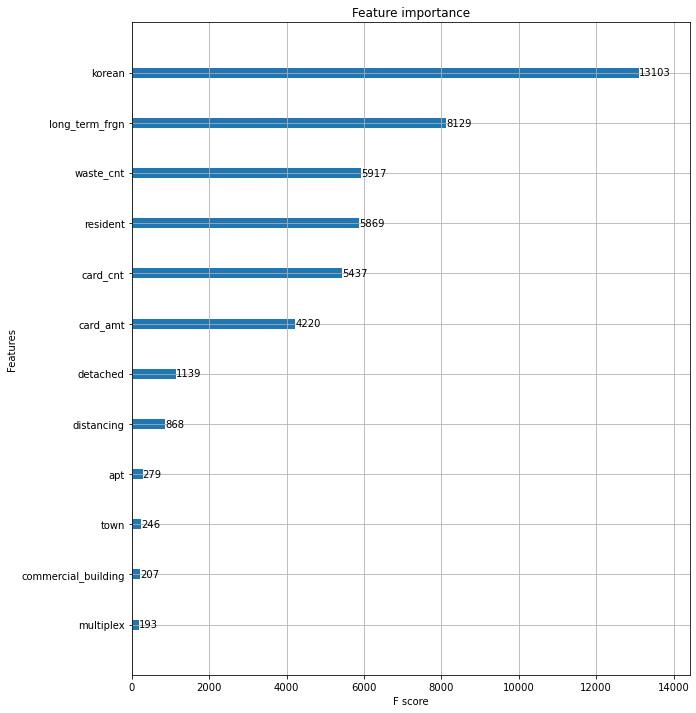

In [45]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)